<a href="https://colab.research.google.com/github/CLAUDERNORONHA/LAB_ANALISE-PREDITIVA/blob/main/PREVENDO_VENDAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DADOS DA LOJA

* StoreType: tipo da loja (a,b,c,d)

*Assortment: 
     
         a = basic

         b = extra

         c = extended

* ComppetitionOpenSince[Month/Year]: Data que a loja concorrente foi aberta

* ComppetitioDistance[metros]: Distancia para a loja concorrente mais perto

* Promo2:  Promoção continua e consecutuva em algunas lojas: 
              
              
            0 = Não está participando 
                                                           1 = Está participando

* Promo2Since[year/week]: data qunado a loja começou a participar da Promo2

*PromoInteval: intervalos conseuctivos que a Promo2 é iniciada(meses).  
    Exemplo; "Feb,May,Aug,Nov" indica que cada "Round" da promoção começa em Februay, 
    May, August,November.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [5]:
sales_train_df = pd.read_csv('/content/drive/My Drive/Ciência de Dados para Empresas e Negócios-IA/Bases de dados/train.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
sales_train_df['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6])

In [8]:
sales_train_df['Open'].unique()

array([1, 0])

In [9]:
sales_train_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [10]:
sales_train_df['SchoolHoliday'].unique()

#1 feriado escolar
#0 Não é feriado escolar

array([1, 0])

In [11]:
sales_train_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [12]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [13]:
sales_train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


DADOS DAS LOJAS

In [14]:
store_info_df = pd.read_csv('/content/drive/My Drive/Ciência de Dados para Empresas e Negócios-IA/Bases de dados/store.csv')

In [15]:
store_info_df.shape

(1115, 10)

In [16]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [17]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Tem valores nulos

In [18]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## EXPLORAÇÃO DOS DADOS

DADOS DAS VENDAS

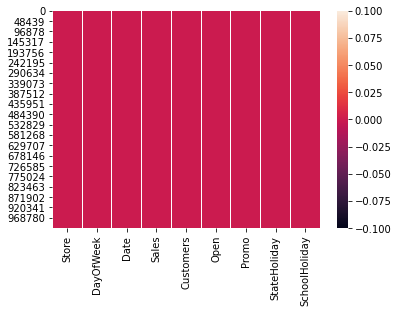

In [19]:
sns.heatmap(sales_train_df.isnull());


#OBS: Não tem valores nulos.

In [20]:
#Para ter certeza que não tem nenhum valor nulo, vamos fazer outro comando.

sales_train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

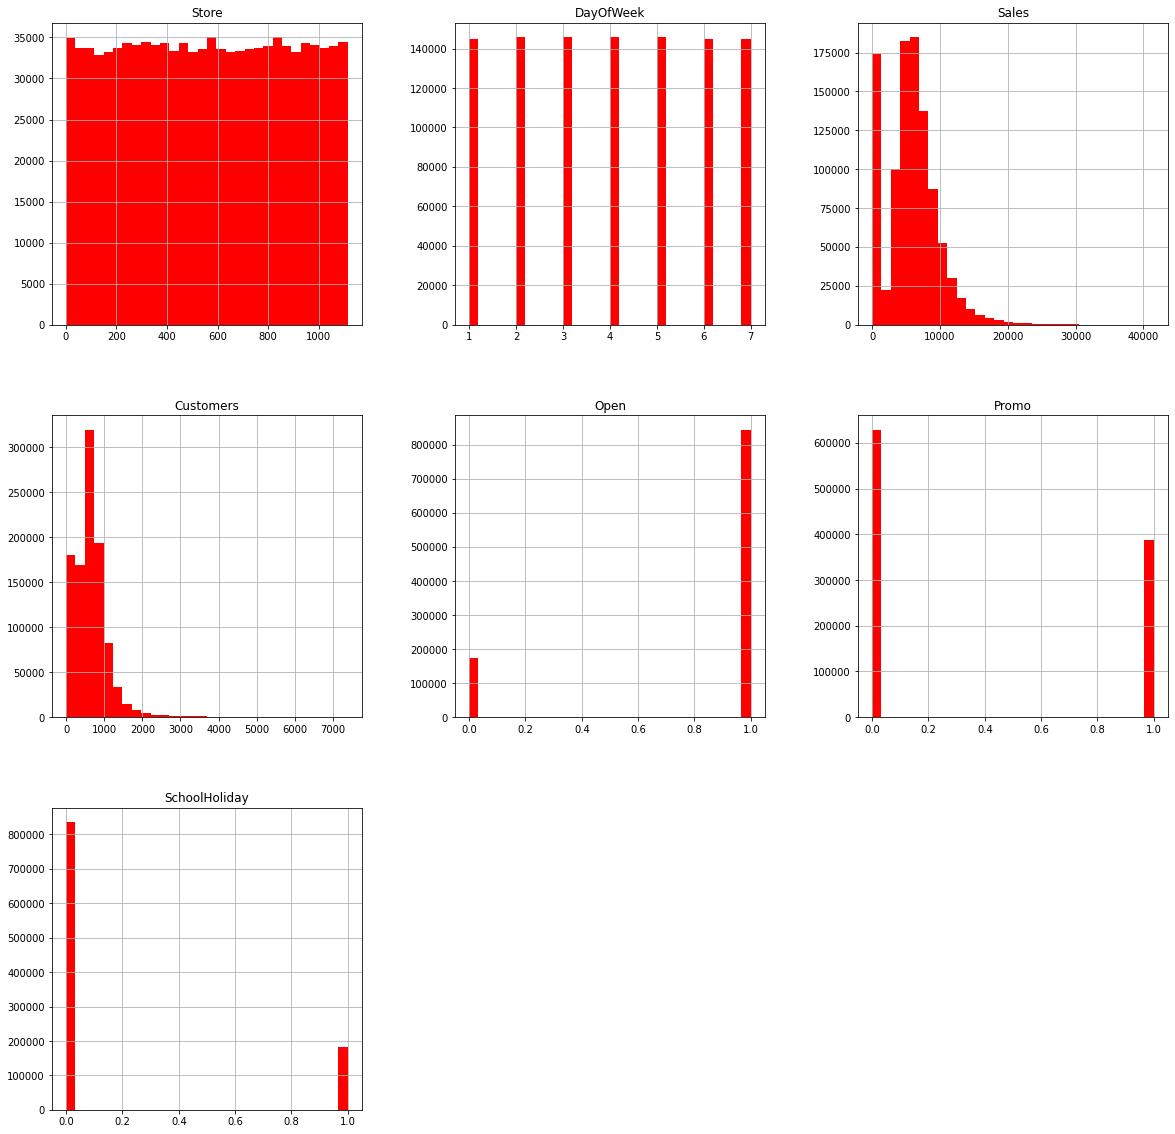

In [21]:
#Gerar um histograma 

sales_train_df.hist(bins = 30, figsize=(20,20), color = 'r' );

In [22]:
#Para saber a quantidade de clientes em um dia.

sales_train_df['Customers'].max()

7388

Criar dois dataframe para saber quais lojas estão aberta ou fechada.

In [23]:
clossed_train_df = sales_train_df[sales_train_df['Open'] == 0] # loja fechada
open_train_df = sales_train_df[sales_train_df['Open'] ==  1] # loja aberta

In [24]:
print('Total = ', len(sales_train_df))
print('Numero de lojas/dias fechado =', len(clossed_train_df))
print('Número de lojas/dias aberto ', len(open_train_df))

Total =  1017209
Numero de lojas/dias fechado = 172817
Número de lojas/dias aberto  844392


In [25]:
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [26]:
sales_train_df.shape

(844392, 9)

In [27]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [28]:

#Precisamos apagar a coluna OPEN. 
sales_train_df.drop(['Open'], axis = 1, inplace= True)

In [29]:
sales_train_df.shape
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [30]:
sales_train_df.describe()
#quando apagamos as colunas custammer 0 , porque estava enfluenciando a base de dados, os valores estão mais 
# precisos.

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


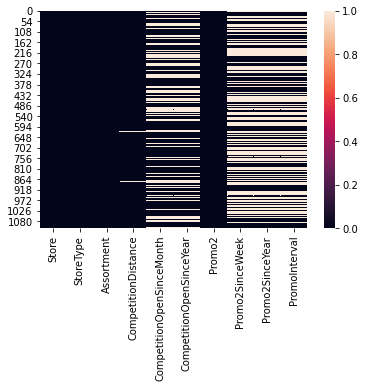

In [31]:
sns.heatmap(store_info_df.isnull());
#Onde tem tracinhos brancos, existe valores nulos.

VAMOS TRABALHAR OS DADOS FALTANTES

In [32]:
store_info_df[store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [33]:
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [34]:
#Filtrar as lojas que não estão participando da promoção 
store_info_df[store_info_df['Promo2'] == 0]


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [35]:
str_cols = [['Promo2SinceWeek','Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear','CompetitionOpenSinceMonth']]
for str in str_cols: #Foi feito um comando para preencher os valores nulos
  store_info_df[str].fillna(0, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


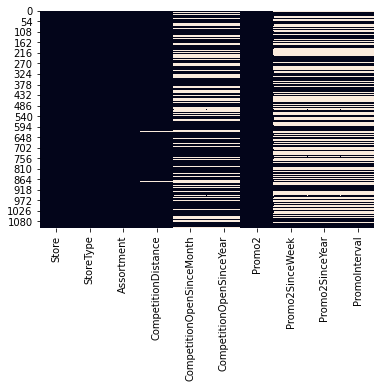

In [36]:
sns.heatmap(store_info_df.isnull(), cbar= False);

In [37]:
#OUTRA FORMA DE PREENCHER VALORES NULOS.

store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace = True)
store_info_df['CompetitionOpenSinceMonth'].fillna(store_info_df['CompetitionOpenSinceMonth'].mean(), inplace = True)
store_info_df['Promo2SinceWeek'].fillna(store_info_df['Promo2SinceWeek'].mean(), inplace = True)
store_info_df['CompetitionOpenSinceYear'].fillna(store_info_df['CompetitionOpenSinceYear'].mean(), inplace = True)
store_info_df['Promo2SinceYear'].fillna(store_info_df['Promo2SinceYear'].mean(), inplace = True)
#store_info_df['PromoInterval'].fillna(store_info_df['PromoInterval'].mean(), inplace = True)


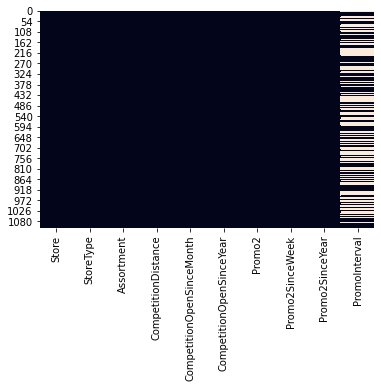

In [38]:
#Demostrativo de grafico, para valores nulos
sns.heatmap(store_info_df.isnull(), cbar = False);

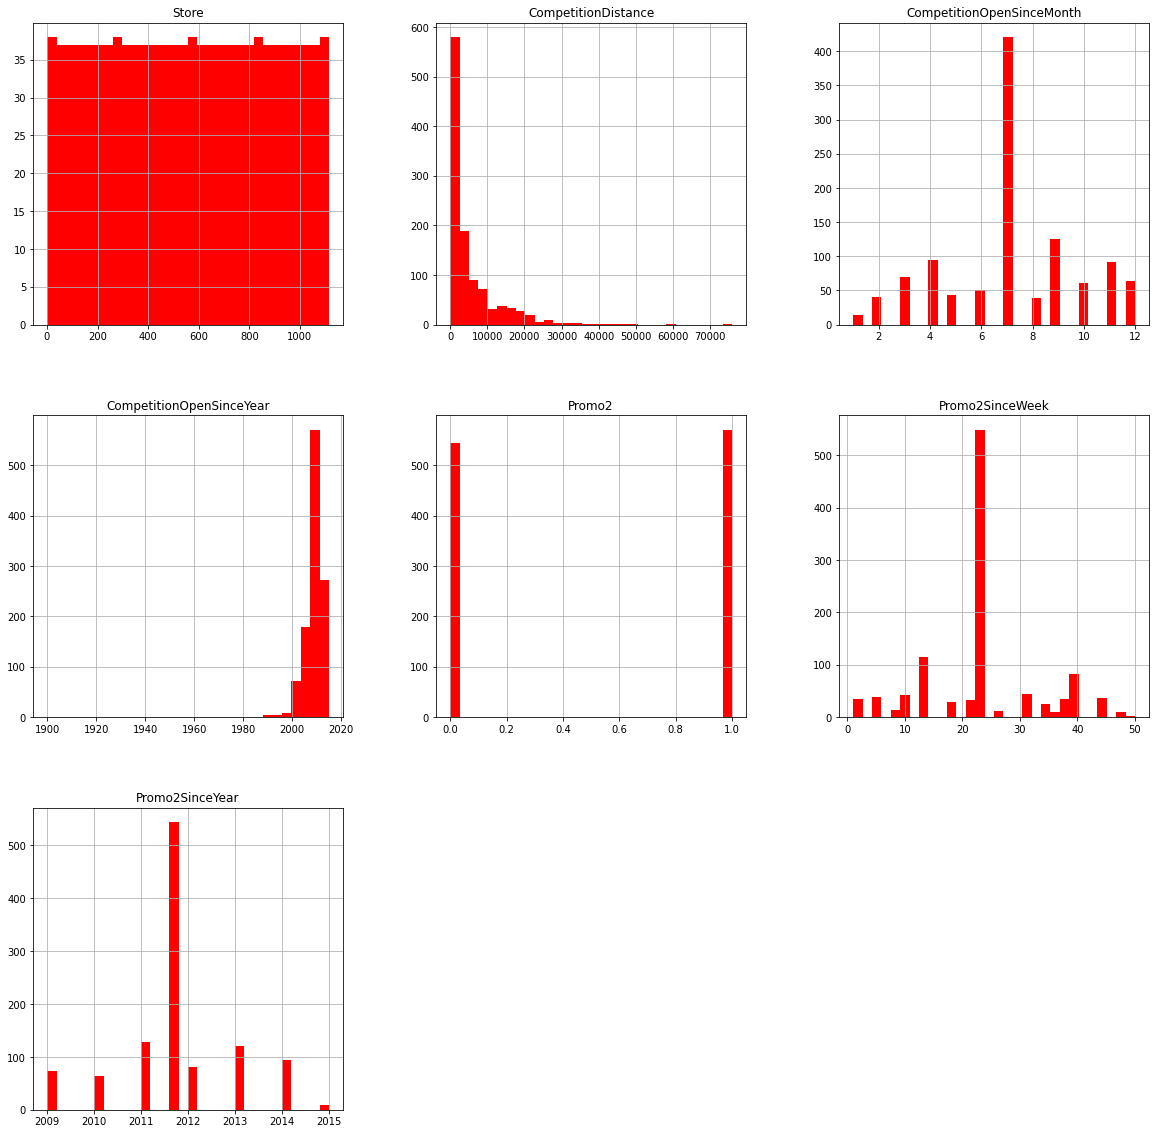

In [39]:
store_info_df.hist(bins = 30, figsize=(20,20), color = 'r');

DADOS UNIDOS(VENDAS + LOJAS)

In [40]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [41]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.763573,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.000000,2010.000000,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.000000,2011.000000,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,23.595447,2011.763573,NaN
4,5,a,a,29910.0,4.0,2015.0,0,23.595447,2011.763573,NaN


In [42]:
#Essa função faz a junção dos dois Dataframe. Utilizando o comando MARGE, que tem a amesma função do inner Join do SQL

sales_train_all_df = pd.merge(sales_train_df, store_info_df , how = 'inner', on = 'Store')

In [43]:
sales_train_all_df.shape

(844392, 17)

In [44]:
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.763573,NaN
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.763573,NaN
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.763573,NaN
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.763573,NaN
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.763573,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,23.595447,2011.763573,NaN
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,23.595447,2011.763573,NaN
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,23.595447,2011.763573,NaN
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,23.595447,2011.763573,NaN


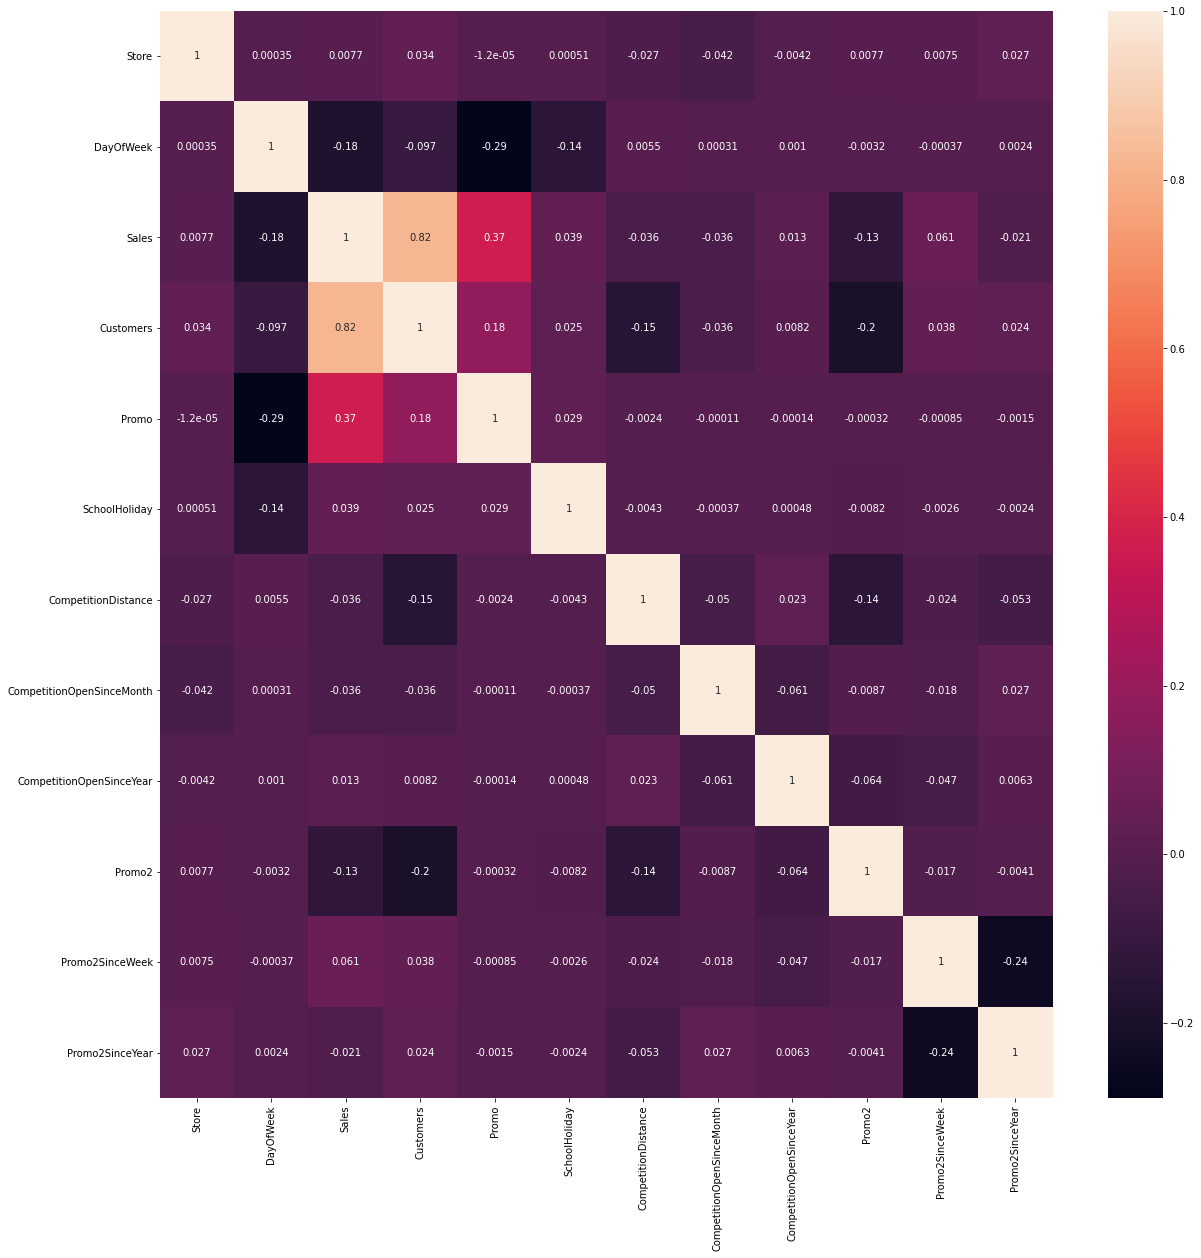

In [45]:
correlations = sales_train_all_df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot= True);

In [46]:
correlations = sales_train_all_df.corr()['Sales'].sort_values()

In [47]:
correlations

DayOfWeek                   -0.178736
Promo2                      -0.127596
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.036281
Promo2SinceYear             -0.021000
Store                        0.007710
CompetitionOpenSinceYear     0.013447
SchoolHoliday                0.038617
Promo2SinceWeek              0.061270
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

In [48]:
sales_train_all_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,23.595447,2011.763573,NaN
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,23.595447,2011.763573,NaN
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,23.595447,2011.763573,NaN
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,23.595447,2011.763573,NaN
844391,292,3,2013-01-02,5076,672,0,0,1,a,a,1100.0,6.0,2009.0,0,23.595447,2011.763573,NaN


In [49]:
#Tirar do Dataframe apenas a coluna ano, mês e dia
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day

In [50]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.763573,NaN,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.763573,NaN,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.763573,NaN,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.763573,NaN,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.763573,NaN,2015,7,27


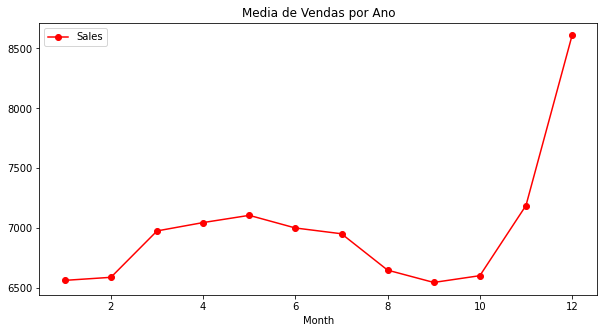

In [51]:
#Queremos saber o ano que teve mais venda.

axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Media de Vendas por Ano');

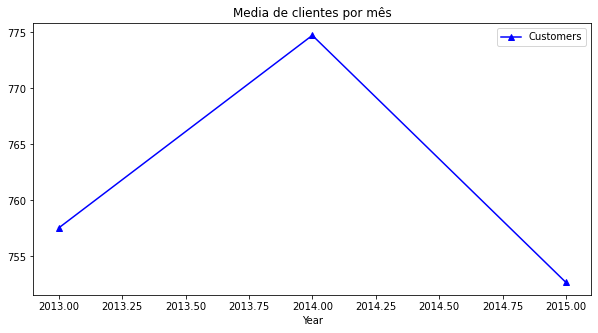

In [52]:
#Ano que teve mais clientes

axis = sales_train_all_df.groupby('Year')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Media de clientes por mês');

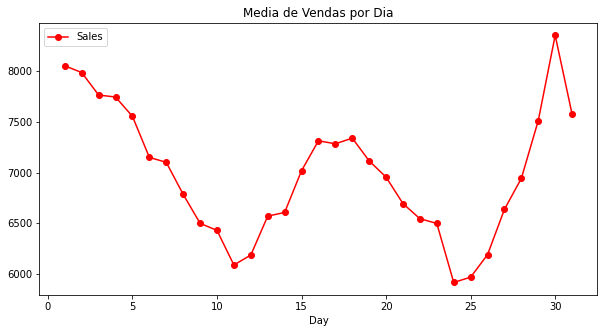

In [53]:
#Vendas por dia 
axis = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Media de Vendas por Dia');

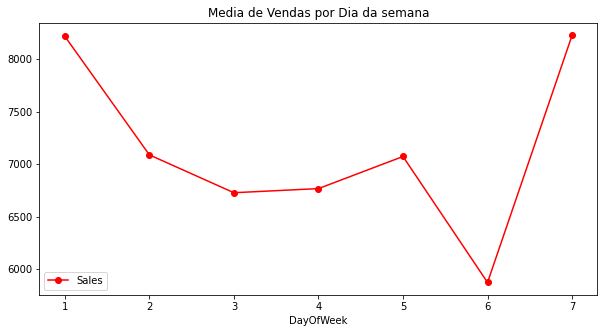

In [54]:
axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Media de Vendas por Dia da semana');

Observamos que o maior dia de venda é domingo e na segunda feira

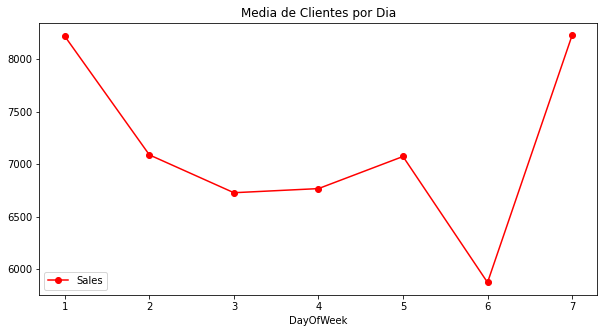

In [55]:
axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Media de Clientes por Dia');

mostra o dia da semana que tem o maior numero de clientes dentro da loja

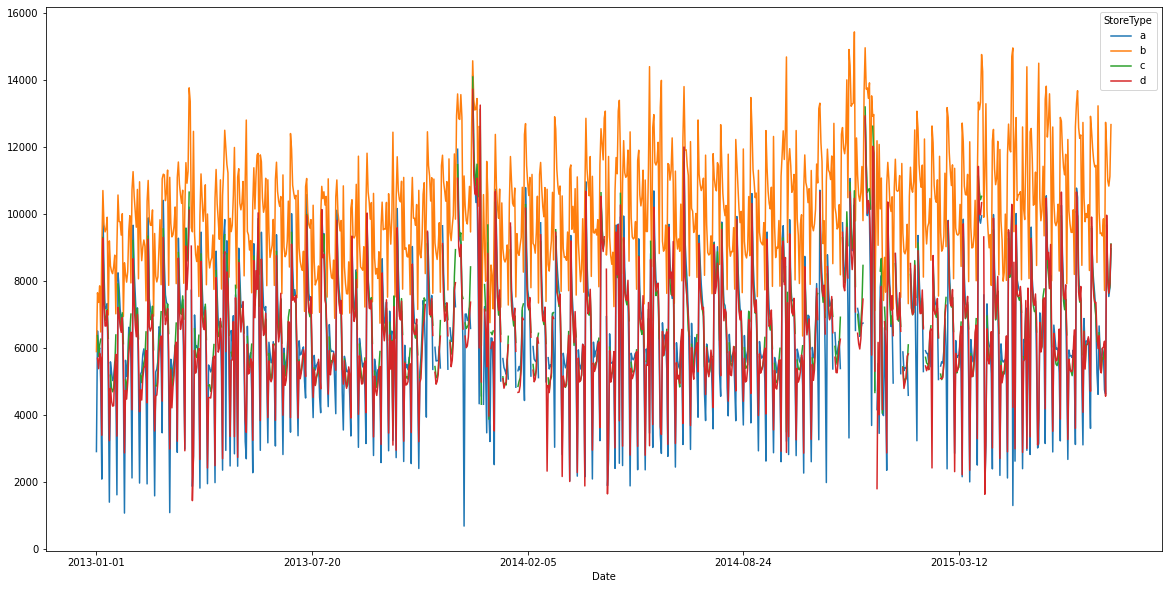

In [56]:
fig, ax = plt.subplots(figsize = (20,10))
sales_train_all_df.groupby(['Date','StoreType']).mean()['Sales'].unstack().plot(ax=ax);

obseravmos queo tipo b o laranja possui o maior media de venda e a menor media de venda é o da cor azul
no eixo de X temos as datas da vendas. A data maxima das vendas é 31-07

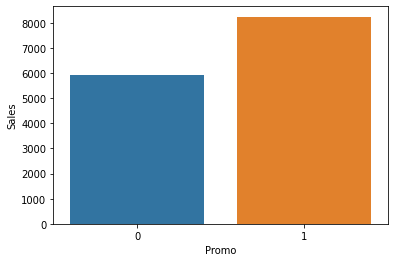

In [57]:
sns.barplot(x = 'Promo', y= 'Sales', data = sales_train_all_df);

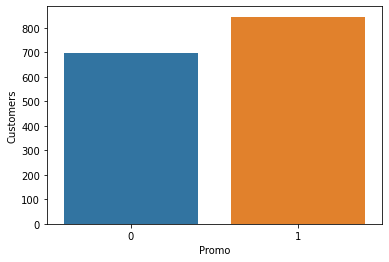

In [58]:
#vamos ver quando tem alguma primoção aumenta o numero de clientes dentro da loja

sns.barplot(x = 'Promo',  y = 'Customers', data= sales_train_all_df);

# PREVISÃODE VENDAS FUTURAS

In [59]:
!pip install fbprophet

In [60]:
from fbprophet import Prophet

In [61]:
#Precisamos das colunas de DATE que vai ser ---- ds
# Sales -- vai ser y

def sales_prediction(store_id, sales_df, periods):
  sales_df = sales_df[sales_df['Store'] == store_id]
  sales_df = sales_df[['Date','Sales']].rename(columns = {'Date': 'ds', 'Sales':'y'})
  sales_df = sales_df.sort_values(by = 'ds')

#TREINAMENTO DOS ARQUIVOS

  model = Prophet()
  model.fit(sales_df)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure1 = model.plot(forecast, xlabel = 'Data', ylabel = 'Vendas')
  figure2 = model.plot_components(forecast)


  return sales_df, forecast

In [62]:
#df = sales_prediction(10, sales_train_all_df, 60)
#df

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


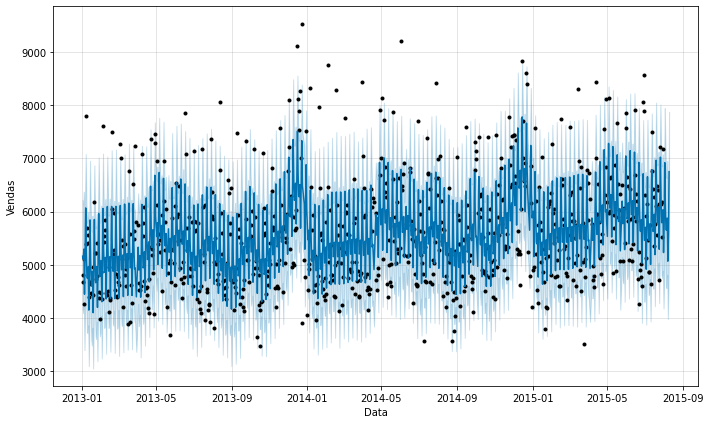

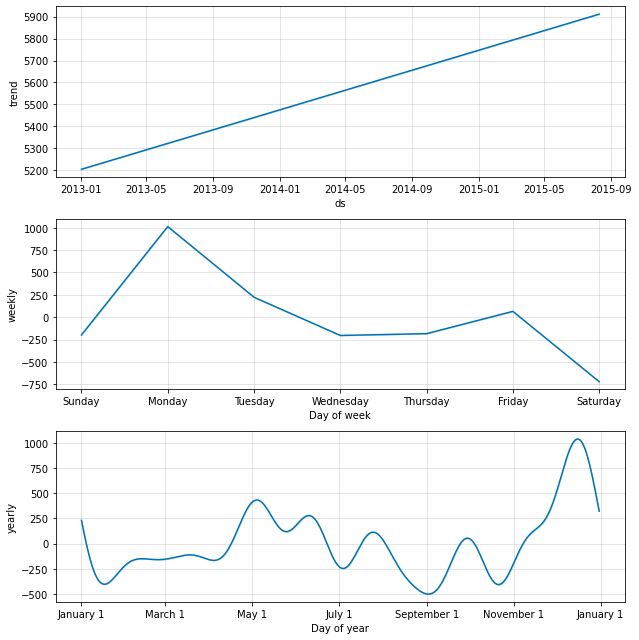

In [63]:
df_origin, df_prediction = sales_prediction(10, sales_train_all_df, 10)

In [64]:
df_prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5204.484727,4169.016607,6220.373370,5204.484727,5204.484727,-44.077962,-44.077962,-44.077962,-203.046067,-203.046067,-203.046067,158.968105,158.968105,158.968105,0.0,0.0,0.0,5160.406765
1,2013-01-03,5205.228405,4094.785554,6146.239306,5205.228405,5205.228405,-93.232653,-93.232653,-93.232653,-183.012971,-183.012971,-183.012971,89.780317,89.780317,89.780317,0.0,0.0,0.0,5111.995752
2,2013-01-04,5205.972083,4291.107720,6375.814179,5205.972083,5205.972083,89.471792,89.471792,89.471792,65.942825,65.942825,65.942825,23.528967,23.528967,23.528967,0.0,0.0,0.0,5295.443875
3,2013-01-05,5206.715761,3396.882088,5547.403417,5206.715761,5206.715761,-758.331393,-758.331393,-758.331393,-719.174286,-719.174286,-719.174286,-39.157107,-39.157107,-39.157107,0.0,0.0,0.0,4448.384368
4,2013-01-07,5208.203117,4979.258101,7083.488354,5208.203117,5208.203117,861.318599,861.318599,861.318599,1013.040634,1013.040634,1013.040634,-151.722034,-151.722034,-151.722034,0.0,0.0,0.0,6069.521716


In [65]:
df_prediction.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
784,2015-08-01,5904.754320,4176.009205,6278.776430,5904.754320,5904.754320,-673.734983,-673.734983,-673.734983,-719.174286,-719.174286,-719.174286,45.439303,45.439303,45.439303,0.0,0.0,0.0,5231.019337
785,2015-08-02,5905.498641,4700.658144,6820.242641,5905.498641,5905.498641,-172.385687,-172.385687,-172.385687,-197.423916,-197.423916,-197.423916,25.038229,25.038229,25.038229,0.0,0.0,0.0,5733.112954
786,2015-08-03,5906.242962,5837.123782,7946.211977,5906.242962,5906.242962,1015.917486,1015.917486,1015.917486,1013.040634,1013.040634,1013.040634,2.876853,2.876853,2.876853,0.0,0.0,0.0,6922.160448
787,2015-08-04,5906.987283,5067.876216,7310.308727,5906.987283,5906.987283,202.989916,202.989916,202.989916,223.673781,223.673781,223.673781,-20.683865,-20.683865,-20.683865,0.0,0.0,0.0,6109.977199
788,2015-08-05,5907.731604,4573.779514,6747.878910,5907.731604,5907.731604,-248.332224,-248.332224,-248.332224,-203.046067,-203.046067,-203.046067,-45.286157,-45.286157,-45.286157,0.0,0.0,0.0,5659.399381
789,2015-08-06,5908.475925,4562.734732,6636.631083,5908.475925,5908.475925,-253.597221,-253.597221,-253.597221,-183.012971,-183.012971,-183.012971,-70.584250,-70.584250,-70.584250,0.0,0.0,0.0,5654.878705
790,2015-08-07,5909.220246,4814.448581,6953.763465,5909.220246,5909.220246,-30.309420,-30.309420,-30.309420,65.942825,65.942825,65.942825,-96.252245,-96.252245,-96.252245,0.0,0.0,0.0,5878.910826
791,2015-08-08,5909.964567,3979.799513,6092.054130,5909.964567,5909.964568,-841.165148,-841.165148,-841.165148,-719.174286,-719.174286,-719.174286,-121.990862,-121.990862,-121.990862,0.0,0.0,0.0,5068.799419
792,2015-08-09,5910.708888,4562.074579,6559.910996,5910.708886,5910.708900,-344.956807,-344.956807,-344.956807,-197.423916,-197.423916,-197.423916,-147.532891,-147.532891,-147.532891,0.0,0.0,0.0,5565.752082
793,2015-08-10,5911.453209,5630.082104,7877.496610,5911.453200,5911.453235,840.393413,840.393413,840.393413,1013.040634,1013.040634,1013.040634,-172.647221,-172.647221,-172.647221,0.0,0.0,0.0,6751.846622


In [66]:
df_origin.tail()

,ds,y
7040,2015-07-27,7212
7039,2015-07-28,6140
7038,2015-07-29,5524
7037,2015-07-30,6186
7036,2015-07-31,7185


Se comparar os dois dataframes, o primeiro mostra as datas futuras ou seja, já estamos prevendo o futuro de vendas. Esse material deve
ser entregue para os tomadores de dcisões.

Salvando o arquivo

In [67]:
df_prediction.tail(60).to_csv('previsoes_vendas.csv')